In [2]:
from packaging import version
import sklearn

assert version.parse(sklearn.__version__) >= version.parse("1.0.1")

## 데이터 다운로드하기

In [3]:
from pathlib import Path
import pandas as pd
import tarfile
import urllib.request

def load_housing_data():
    tarball_path = Path("datasets/housing.tgz")
    if not tarball_path.is_file():
        Path("datasets").mkdir(parents=True, exist_ok=True)
        url = "https://github.com/ageron/data/raw/main/housing.tgz"
        urllib.request.urlretrieve(url, tarball_path)
        with tarfile.open(tarball_path) as housing_tarball:
            housing_tarball.extractall(path="datasets")
    return pd.read_csv(Path("datasets/housing/housing.csv"))

housing = load_housing_data()

In [4]:
# 한글 깨짐
import sys

# 노트북이 코랩에서 실행 중인지 체크합니다.
if 'google.colab' in sys.modules:
    !echo 'debconf debconf/frontend select Noninteractive' | debconf-set-selections
    # 나눔 폰트를 설치합니다.
    !sudo apt-get -qq -y install fonts-nanum
    import matplotlib.font_manager as fm
    font_files = fm.findSystemFonts(fontpaths=['/usr/share/fonts/truetype/nanum'])
    for fpath in font_files:
        fm.fontManager.addfont(fpath)

    # 나눔바른고딕 폰트로 설정합니다.
    import matplotlib.pyplot as plt
    plt.rc('font', family='NanumBarunGothic')
    # 마이너스 기호 표시 오류 수정
    import matplotlib
    matplotlib.rcParams['axes.unicode_minus'] = False

Selecting previously unselected package fonts-nanum.
(Reading database ... 123589 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Setting up fonts-nanum (20200506-1) ...
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...


## 데이터 구조 훑어 보기

In [5]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [6]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [7]:
housing["ocean_proximity"].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [8]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


std - 행은 값이 퍼져있는 정도를 측정하는 표준편차<br>
25%, 50%, 75% - 행은 백분위수
- 25%의 구역: 18보다 작다, 25번째 백분위수(제1사분위수)
- 50%의 구역: 29보다 작다, 중간값
- 75%의 구역: 37보다 작다, 75번째 백분위수(제3사분위수)


데이터의 형태를 빠르게 검토하는 다른 방법은 각 숫자형 특성을 히스토그램으로 그려보는 것이다. <br>
히스토그램은 주어진 값의 범위(수평축)에 속한 샘플 수 (수직축)을 나타낸다. <br>
전체 데이터셋에 대해 hist() 메서드를 호출해 모든 숫자형 특성에 대한 히스토그램을 출력

In [9]:
IMAGES_PATH = Path() / "images" / "end_to_end_project"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

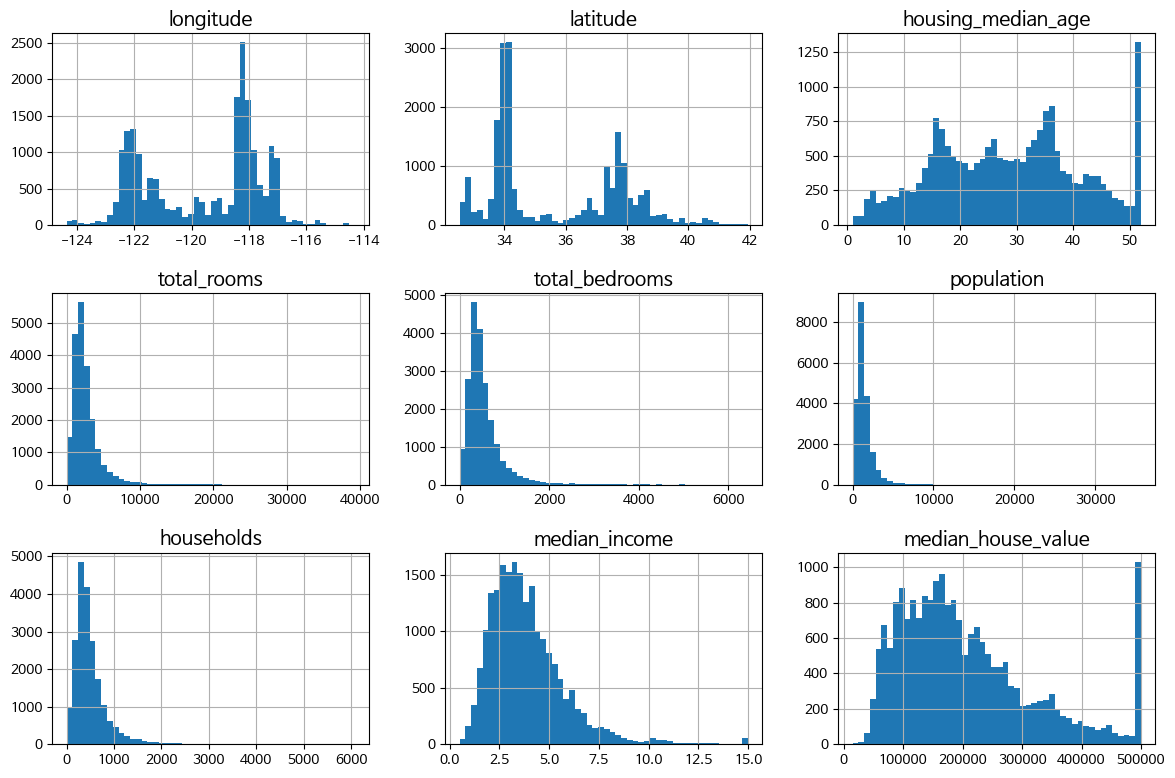

In [10]:
import matplotlib.pyplot as plt
# 추가 코드 – 다음 다섯 라인은 기본 폰트 크기를 지정합니다
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

housing.hist(bins=50, figsize=(12, 8))
save_fig("attribute_histogram_plots")  # 추가 코드
plt.show()

중간 소득(median_income) 특성이 US 달러로 표현되어 있지 않다.<br>
데이터가 이미 전처리 되어있는 경우이다.

---



중간 주택 연도(housing_median_age)와 중간 주탁 가격(median_house_value)는 최댓값과 최솟값을 한정한 경우이다.<br>
중간 주택 가격의 경우 타깃 속성(레이블)으로 사영되기 때문에 심각한 문제가 될 수 있음 <br>
가격이 한계값을 넘어가지 않도록 학습될 수 있다. 클라이언트 팀과 함께 이 문제를 검토해야한다. <br>
만약 그 팀이 $500000를 넘어가더라도 정확한 예측값을 필요로 한다면 할 수 있는 방법은 2가지 이다.
- 한곗값 밖의 구역에 대한 정확한 레이블을 구한다.
- 훈련 세트에서 이런 구역을 제거한다


---



특성들의 스케일이 서로 많이 다름. 뒷장에서 본다
- 아마도 전처리과정일 것 같음
---

많은 히스토그램에서 오른쪽 꼬리가 더 길다. 즉, 가운데에서 왼쪽보다 오른쪼긍로 더 멀리 뻗어있다. 이런 형태는 일부 머신러닝 알고리즘에서 패턴을 찾기 어렵게 만든다. 나중에 이런 특성들을 좀 더 종 모양의 분포가 되도록 변형시킨다.

---

**데이터를 더 깊게 들여다보기 전에 테스트 세트를 분리해야 한다. 그리고 테스트 세트를 절대 들여다보면 안된다.**

## 테스트 세트 만들기

**데이터 스누핑 편향**: 테스트세트에 일반화 오차를 추정하면 시스템을 론칭했을 때 기대한 성능이 나오지 않는다
    - 즉, 테스트세트에 과적합되서 실제 데이터에는 성능이 떨어지는 경우

In [11]:
import numpy as np

def shuffle_and_split_data(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]

    return data.iloc[train_indices], data.iloc[test_indices]


`np.random.permutation()` 함수는 numpy 라이브러리에서 제공하는 함수로, 주어진 배열의 요소를 무작위로 섞은 배열을 반환합니다. 이 함수는 두 가지 방식으로 사용할 수 있습니다:
<br>
<br>
배열을 입력으로 받는 경우:
주어진 배열을 무작위로 섞은 새로운 배열을 반환합니다.


```
import numpy as np

array = np.array([1, 2, 3, 4, 5])
shuffled_array = np.random.permutation(array)

print(shuffled_array)
# 예시 출력: [3 5 2 1 4] (출력은 매번 다를 수 있습니다)

```
<br>
<br>
정수를 입력으로 받는 경우:
0부터 입력된 정수 -1까지의 숫자를 무작위로 섞은 배열을 반환합니다.


```
import numpy as np

n = 5
shuffled_array = np.random.permutation(n)

print(shuffled_array)
# 예시 출력: [4 1 3 0 2] (출력은 매번 다를 수 있습니다)

```



In [12]:
train_set, test_set = shuffle_and_split_data(housing, 0.2)
len(train_set)

16512

In [13]:
len(test_set)

4128

In [14]:
np.random.seed(42)

위 와같은 경우에 다시 시작하면 테스트세트가 매번 바뀌기 때문에 난수 발생기의 초깃값을 지정해야한다. <br>
`np.random.seed()`

In [15]:
from zlib import crc32


def is_id_in_test_set(identifier, test_ratio):
    return crc32(np.int64(identifier)) < test_ratio * 2 ** 32

def split_data_with_id_hash(data, test_ratio, id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: is_id_in_test_set(id_, test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]

고유한 식별자(ID와 같은...)를 이용하여 데이터가 업데이트 되도 테스트세트가 변경되지 않도록 하기 위한 방법이다.

In [16]:
housing_with_id = housing.reset_index() # index열이 추가된 데이터프레임이 반환됩니다.

train_set, test_set =  split_data_with_id_hash(housing_with_id, 0.2, "index")

행의 인덱스를 고유 식별자로 사용할 때는 새 데이터는 데이터셋의 끝에 추가되야한다.
<br>
위처럼 안된다면 변하지 않는 특성을 사용하여 ID를 만든다.

In [17]:
housing_with_id["id"] = housing["longitude"] * 1000 + housing["latitude"]
train_set, test_set = split_data_with_id_hash(housing_with_id, 0.2, "id")

인덱스의 조건이 불가능 할 때는 안정적인 특성을 이용한다.

In [18]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

In [19]:
test_set["total_bedrooms"].isnull().sum()

44

In [20]:
# 추가 코드 – 나쁜 샘플을 얻을 확률 10.7%를 계산하는 방법

from scipy.stats import binom

sample_size = 1000
ratio_female = 0.511
proba_too_small = binom(sample_size, ratio_female).cdf(485 - 1)
proba_too_large = 1 - binom(sample_size, ratio_female).cdf(535)
print(proba_too_small + proba_too_large)

0.10736798530929942


In [21]:
# 추가 코드 – 나쁜 샘플을 얻을 확률을 시물레이션으로 계산 하는 방법

np.random.seed(42)

samples = (np.random.rand(100_000, sample_size) < ratio_female).sum(axis=1)
((samples < 485) | (samples > 535)).mean()

0.1071

**계층적 샘플링 (stratified sampling)**
<br>
모집단을 여러 계층(strata)으로 나눈 후, 각 계층에서 표본을 추출하는 방법
<br>
<br>
**예시**
<br>
예를 들어, 한 학교의 학생들을 대상으로 학년별로 계층을 나누어 샘플링한다고 가정해 보겠습니다.<br> 학교에는 총 1000명의 학생이 있으며, 학년별 학생 수는 다음과 같습니다:
<br>
1학년: 200명<br>
2학년: 300명<br>
3학년: 250명<br>
4학년: 250명<br>
<br>
총 100명의 학생을 표본으로 추출하려고 할 때, 각 학년에서 추출할 학생 수는 다음과 같이 결정될 수 있습니다:<br>
<br>
1학년: (200/1000) * 100 = 20명<br>
2학년: (300/1000) * 100 = 30명<br>
3학년: (250/1000) * 100 = 25명<br>
4학년: (250/1000) * 100 = 25명<br>





In [22]:
housing["income_cat"] = pd.cut(housing["median_income"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1,2,3,4,5]
                               )

In [23]:
# 추가 코드 - 고해상도 PNG 파일로 그래프를 저장하기 위한 코드

IMAGES_PATH = Path() / "images" / "end_to_end_project"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

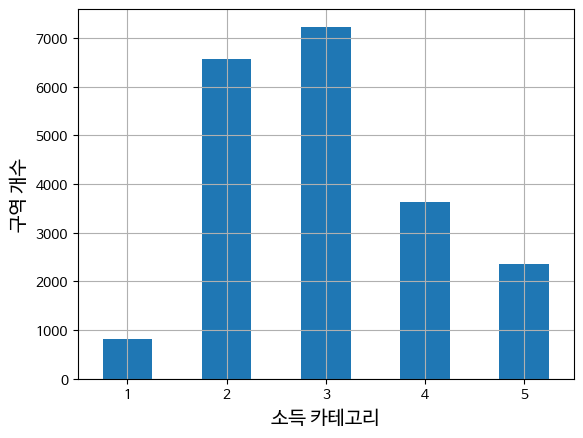

In [24]:
housing["income_cat"].value_counts().sort_index().plot.bar(rot=0, grid=True)
plt.xlabel("소득 카테고리")
plt.ylabel("구역 개수")
plt.show()

In [25]:
from sklearn.model_selection import StratifiedShuffleSplit

splitter = StratifiedShuffleSplit(n_splits=10, test_size=0.2, random_state=32)
strat_splits = []
for train_index, test_index in splitter.split(housing, housing["income_cat"]):
    strat_train_set_n = housing.iloc[train_index]
    strat_test_set_n = housing.iloc[test_index]
    strat_splits.append([strat_train_set_n, strat_test_set_n])

In [26]:
strat_train_set, strat_test_set = strat_splits[0]

In [27]:
strat_train_set, strat_test_set = train_test_split(housing, test_size=0.2, stratify=housing["income_cat"], random_state=42)

In [28]:
strat_test_set["income_cat"].value_counts()  / len(strat_test_set)

income_cat
3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: count, dtype: float64

# 2.4 데이터 이해를 위한 탐색과 시각화

In [29]:
# 다양한 변화 실험을 위해서
housing = strat_train_set.copy()


## 2.4.1 지리적 데이터 시각화하기

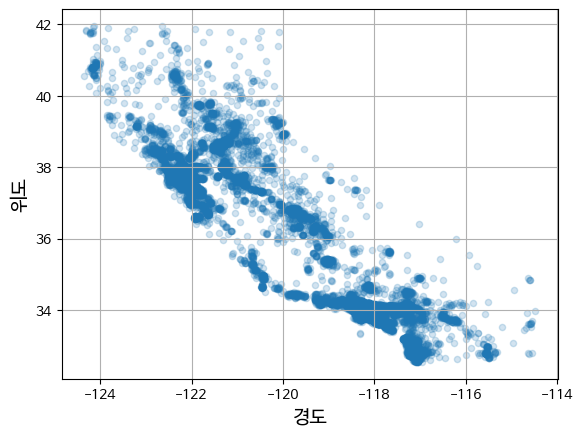

In [30]:
housing.plot(kind="scatter", x="longitude", y="latitude", grid=True, alpha=0.2)
plt.xlabel("경도")
plt.ylabel("위도")
plt.show()

<Axes: xlabel='longitude', ylabel='latitude'>

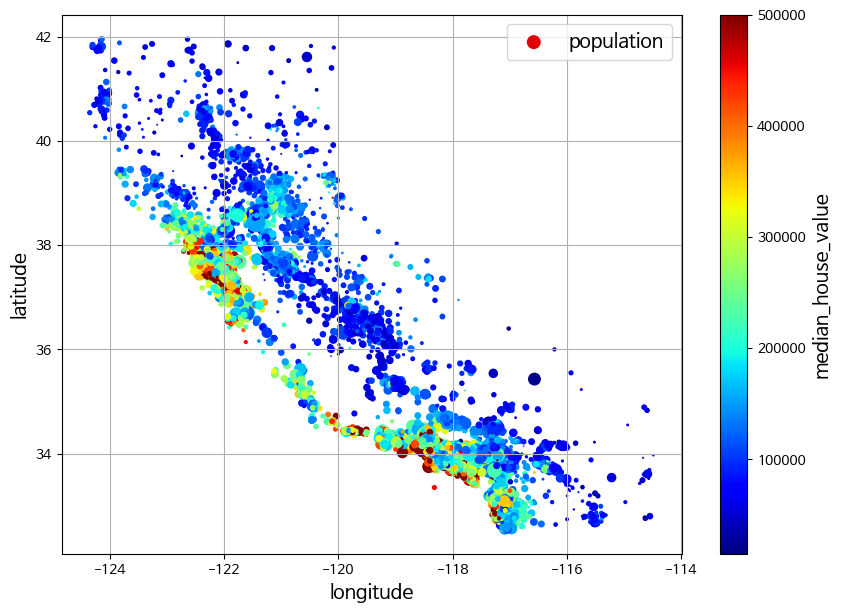

In [31]:
housing.plot(kind="scatter",
             x="longitude",
             y="latitude",
             grid=True,
             s=housing["population"] / 100,
             label="population",
             c="median_house_value",
             cmap='jet',
             colorbar=True,
             legend=True,
             sharex=False,
             figsize=(10, 7)
             )

<ipython-input-23-1ec57a5f027d>:9: UserWarning: Glyph 7452 (\N{LATIN LETTER SMALL CAPITAL U}) missing from current font.
  plt.tight_layout()
<ipython-input-23-1ec57a5f027d>:9: UserWarning: Glyph 7429 (\N{LATIN LETTER SMALL CAPITAL D}) missing from current font.
  plt.tight_layout()
<ipython-input-23-1ec57a5f027d>:10: UserWarning: Glyph 7452 (\N{LATIN LETTER SMALL CAPITAL U}) missing from current font.
  plt.savefig(path, format=fig_extension, dpi=resolution)
<ipython-input-23-1ec57a5f027d>:10: UserWarning: Glyph 7429 (\N{LATIN LETTER SMALL CAPITAL D}) missing from current font.
  plt.savefig(path, format=fig_extension, dpi=resolution)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 7452 (\N{LATIN LETTER SMALL CAPITAL U}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 7429 (\N{LATIN LETTER SMALL CAPITAL D}) missing from current font

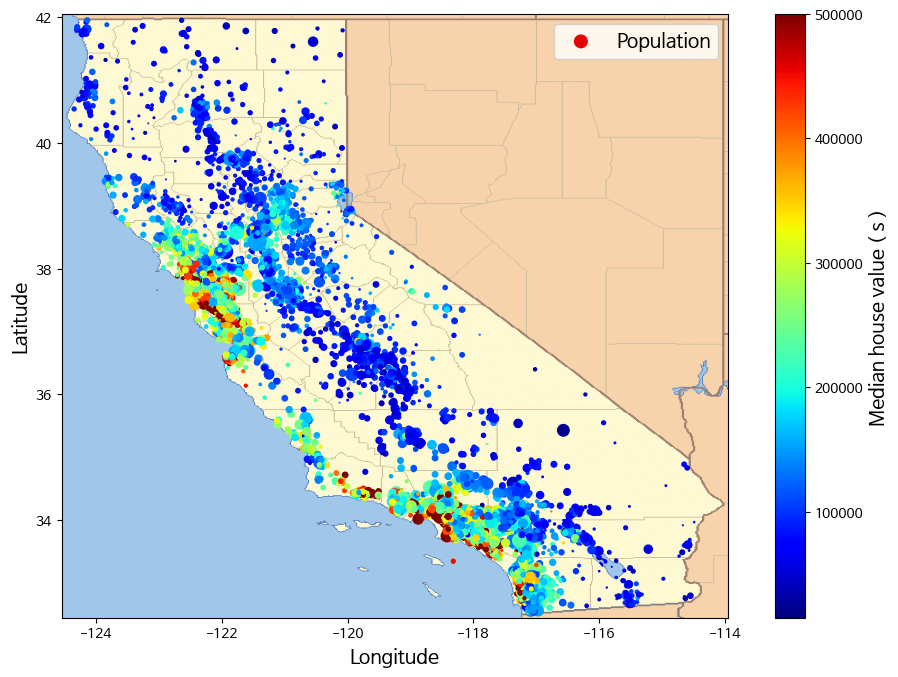

In [32]:
# 추가 코드 – 이 셀은 이 장의 첫 번째 그림을 생성합니다

#  캘리포니아 이미지를 다운로드합니다
filename = "california.png"
if not (IMAGES_PATH / filename).is_file():
    homl3_root = "https://github.com/ageron/handson-ml3/raw/main/"
    url = homl3_root + "images/end_to_end_project/" + filename
    print("Downloading", filename)
    urllib.request.urlretrieve(url, IMAGES_PATH / filename)

housing_renamed = housing.rename(columns={
    "latitude": "Latitude", "longitude": "Longitude",
    "population": "Population",
    "median_house_value": "Median house value (ᴜsᴅ)"})
housing_renamed.plot(
             kind="scatter", x="Longitude", y="Latitude",
             s=housing_renamed["Population"] / 100, label="Population",
             c="Median house value (ᴜsᴅ)", cmap="jet", colorbar=True,
             legend=True, figsize=(10, 7))

california_img = plt.imread(IMAGES_PATH / filename)
axis = -124.55, -113.95, 32.45, 42.05
plt.axis(axis)
plt.imshow(california_img, extent=axis)

save_fig("california_housing_prices_plot")
plt.show()

### 2.4.2 상관관계 조사하기

**표준 상관계수(Standard Correlation Coefficient)**
<br>
두 변수 간의 선형 관계의 정도와 방향을 나타내는 통계적 지표입니다. 가장 일반적으로 사용되는 표준 상관계수는 피어슨 상관계수(Pearson Correlation Coefficient)입니다.

피어슨 상관계수는 -1에서 1 사이의 값을 가지며, 다음과 같은 의미를 갖습니다:

* 1: 완벽한 양의 상관관계 (두 변수는 같은 방향으로 강하게 선형적으로 증가합니다)
* -1: 완벽한 음의 상관관계 (두 변수는 반대 방향으로 강하게 선형적으로 증가합니다)
* 0: 상관관계 없음 (두 변수 사이에 선형적 관계가 없습니다)

In [33]:
corr_matrix = housing.corr(numeric_only=True)

In [34]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688380
total_rooms           0.137455
housing_median_age    0.102175
households            0.071426
total_bedrooms        0.054635
population           -0.020153
longitude            -0.050859
latitude             -0.139584
Name: median_house_value, dtype: float64

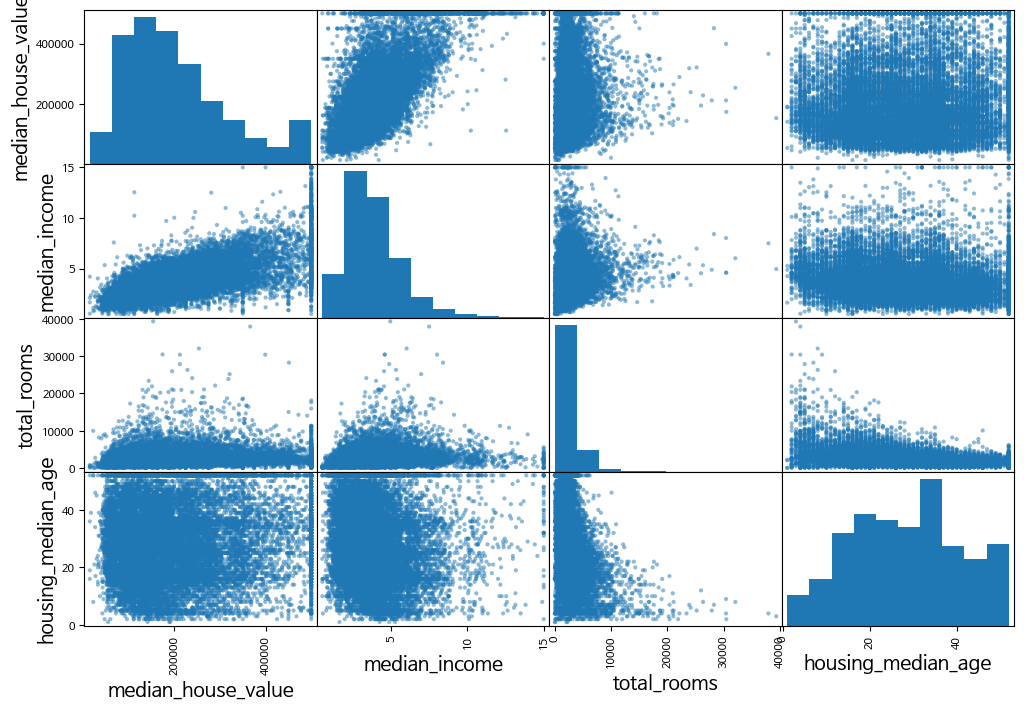

In [35]:
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12, 8))
plt.show()

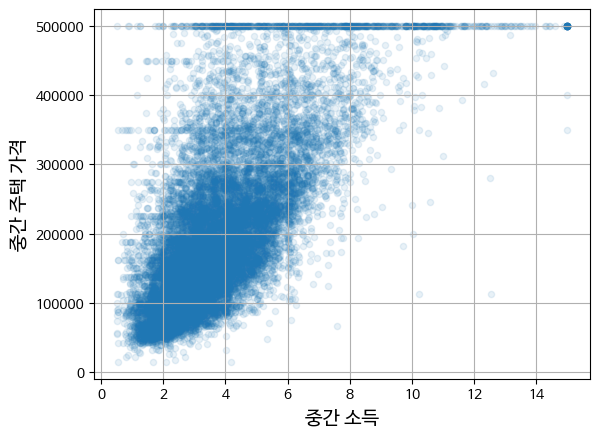

In [36]:
housing.plot(kind="scatter", x="median_income", y="median_house_value", alpha=0.1, grid=True)
plt.xlabel("중간 소득")
plt.ylabel("중간 주택 가격")
plt.show()

## 2.4.3 특성 조합으로 실험하기

In [37]:
housing["rooms_per_house"] = housing["total_rooms"] / housing["households"]
housing["bedrooms_ratio"] = housing["total_bedrooms"] / housing["total_rooms"]
housing["population_per_house"] = housing["population"] / housing["households"]

In [38]:
corr_matrix = housing.corr(numeric_only=True)
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value      1.000000
median_income           0.688380
rooms_per_house         0.143663
total_rooms             0.137455
housing_median_age      0.102175
households              0.071426
total_bedrooms          0.054635
population             -0.020153
population_per_house   -0.038224
longitude              -0.050859
latitude               -0.139584
bedrooms_ratio         -0.256397
Name: median_house_value, dtype: float64

# 2.5 머신러닝 알고리즘을 위한 데이터 준비

이 작업을 수동으로 하는 대신 함수를 만들어 자동화해야 한다.


*   어떤 데이터셋에 대해서도 데이터 변환을 손쉽게 반복할 수 있다.
*   향후 프로젝트에 재사용 가능한 변환 라이브러리를 점진적으로 구축할 수 있다.
*   실제 시스템에서 알고리즘에 새 데이터를 주입하기 전에 이 함수를 사용해 변환할 수 있다.
*   여러 가지 데이터 변환을 쉽게 시도해볼 수 있고 어떤 조합이 가장 좋은지 확인하는데 편리핟.



In [39]:
housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set["median_house_value"].copy()

### 2.5.1 데이터 정제


특성에 값이 없는 경우
*  해당 구역을 제거
*  전체 특성을 삭제
*  누락된 값을 어떤 값으로 채운다. (대체)

In [40]:
#옵션1
# housing.dropna(subset=["total_bedrooms"], inplace=True)

# 옵션2
# housing.drop("total_bedrooms", axis=1, inplace=True)

# 옵션3
# median = housing["total_bedrooms"].median()
# housing["total_bedrooms"].fillna(median, inplace=True)

In [41]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")

In [42]:
housing_num = housing.select_dtypes(include=[np.number])
housing_num

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
13096,-122.42,37.80,52.0,3321.0,1115.0,1576.0,1034.0,2.0987
14973,-118.38,34.14,40.0,1965.0,354.0,666.0,357.0,6.0876
3785,-121.98,38.36,33.0,1083.0,217.0,562.0,203.0,2.4330
14689,-117.11,33.75,17.0,4174.0,851.0,1845.0,780.0,2.2618
20507,-118.15,33.77,36.0,4366.0,1211.0,1912.0,1172.0,3.5292
...,...,...,...,...,...,...,...,...
14207,-118.40,33.86,41.0,2237.0,597.0,938.0,523.0,4.7105
13105,-119.31,36.32,23.0,2945.0,592.0,1419.0,532.0,2.5733
19301,-117.06,32.59,13.0,3920.0,775.0,2814.0,760.0,4.0616
19121,-118.40,34.06,37.0,3781.0,873.0,1725.0,838.0,4.1455


In [43]:
imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [44]:
imputer.statistics_

array([-118.51  ,   34.26  ,   29.    , 2125.    ,  434.    , 1167.    ,
        408.    ,    3.5385])

In [45]:
housing_num.median().values

array([-118.51  ,   34.26  ,   29.    , 2125.    ,  434.    , 1167.    ,
        408.    ,    3.5385])

In [46]:
X = imputer.transform(housing_num)

누락된 값은 평균, 가장 자주 등장하는 값, 상수로 바꿀 수 있다.

*   `SimpleImputer(strategy="mean")`
*   `SimpleImputer(strategy="most_frequent")`
*   `SimpleImputer(strategy="constant", fill_value=...)`

___

더 강력한 클래스도 존재한다.


*   `KNNImputer`: 누락된 값을 이 특성에 대하 ㄴk-최근접 이웃의 평균으로 대체
*   `IterativeImputer`: 특성마다 회귀 모델을 훈련하여 다른 모든 특성을 기반으로 누락된 값을 예측 그 다음 업데이트된 데이터로 모델을 다시 룬현하고 이 과정을 반복하여 모델과 대체 값을 향상 시킨다.



In [47]:
housing_tr = pd.DataFrame(X,
                          columns=housing_num.columns,
                          index=housing_num.index
                          )

### 2.5.2 텍스트와 범주형 특성 다루기

In [48]:
housing_cat = housing[["ocean_proximity"]]
housing_cat.head(8)

,ocean_proximity
13096,NEAR BAY
14973,<1H OCEAN
3785,INLAND
14689,INLAND
20507,NEAR OCEAN
1286,INLAND
18078,<1H OCEAN
4396,NEAR BAY


In [49]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)

In [50]:
housing_cat_encoded[:8]

array([[3.],
       [0.],
       [1.],
       [1.],
       [4.],
       [1.],
       [0.],
       [3.]])

In [51]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

위 표현 방식의 문제는 머신러닝 알고리즘이 가까이 있는 두 값을 떨어져 있는 두 값보다 더 비슷하다고 생각한다

In [52]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)

OneHotEncoder의 출력은 넘파이 매열이 나이라 사이파이 희소 행렬


In [53]:
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

희소행렬은 0이 대부분인 행렬을 매우 효율적으로 표현

*   메모리 절약
*   계산속도 향상


---



In [54]:
# 넘파이 배열로 변경
housing_cat_1hot.toarray()

array([[0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.]])

OneHotEncoder를 만들 때 매개변수를 이용하여 넘파이 변환이 가능하다~

In [55]:
df_test = pd.DataFrame({"ocean_proximity": ["INLAND", "NEAR BAY"]})
pd.get_dummies(df_test)

,ocean_proximity_INLAND,ocean_proximity_NEAR BAY
0,True,False
1,False,True


OneHotEncoder의 장점은 어떤 카테고리로 훈련되어있는지 기억한다.

In [56]:
cat_encoder.transform(df_test).toarray()

array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

In [57]:
df_test_unknown = pd.DataFrame({"ocean_proximity": ["<2H OCEAN", "ISLAND"]})
pd.get_dummies(df_test_unknown)

,ocean_proximity_<2H OCEAN,ocean_proximity_ISLAND
0,True,False
1,False,True


In [58]:
cat_encoder.handle_unknown = 'ignore'
cat_encoder.transform(df_test_unknown).toarray()

array([[0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0.]])

OneHotEncoder는 더 똑똑하다 알 수 없는 카테고리를 감지하고 예외를 발생시킴

In [59]:
cat_encoder.feature_names_in_
cat_encoder.get_feature_names_out()
df_output = pd.DataFrame(cat_encoder.transform(df_test_unknown).toarray(),
                         columns=cat_encoder.get_feature_names_out(),
                         index=df_test_unknown.index)


###  2.5.3 트성 스케일과 변환

머신러닝 알고리즘은 입력된 숫자 특성들의 스케일이 많이 다르면 제대로 작동하지 않는다.

특성의 범위를 같게 만들어주는 방법
*   min-max 스케일링(정규화)
*   표준화
---



In [60]:
 from sklearn.preprocessing import MinMaxScaler

# 정규화 특정 범위 안의 수치로 바꾸는 것
# feature_range 매개변수로 범위 설정 가능
 min_max_scaler = MinMaxScaler(feature_range=(-1,1))
 housing_num_min_max_scaled = min_max_scaler.fit_transform(housing_num)

In [61]:
from sklearn.preprocessing import StandardScaler

# 이상치에 영향을 덜 받는다.
std_scaler = StandardScaler()
housing_num_std_scaled = std_scaler.fit_transform(housing_num)

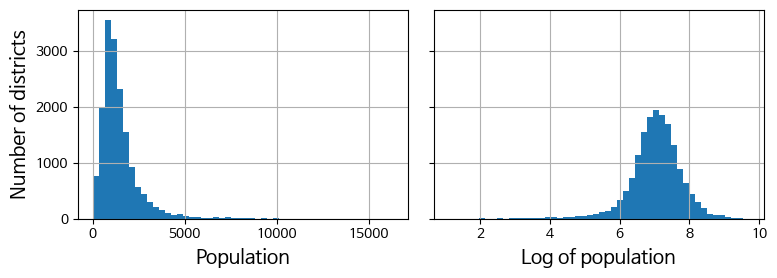

In [62]:
# 추가 코드 – 이 셀은 그림 2–17을 생성합니다
fig, axs = plt.subplots(1, 2, figsize=(8, 3), sharey=True)
housing["population"].hist(ax=axs[0], bins=50)
housing["population"].apply(np.log).hist(ax=axs[1], bins=50)
axs[0].set_xlabel("Population")
axs[1].set_xlabel("Log of population")
axs[0].set_ylabel("Number of districts")
save_fig("long_tail_plot")
plt.show()

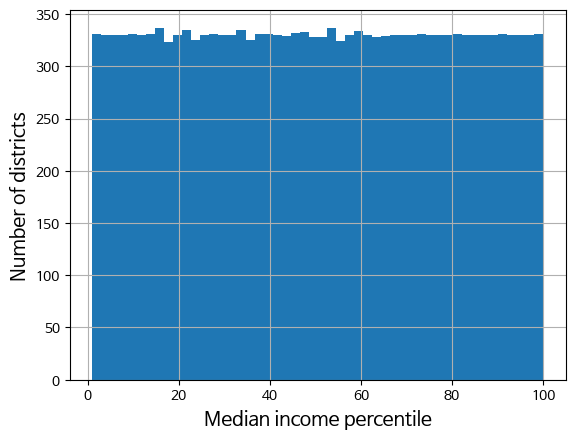

In [63]:
# 추가 코드 – 균등 분포를 얻는다는 것을 보여줍니다
percentiles = [np.percentile(housing["median_income"], p)
               for p in range(1, 100)]
flattened_median_income = pd.cut(housing["median_income"],
                                 bins=[-np.inf] + percentiles + [np.inf],
                                 labels=range(1, 100 + 1))
flattened_median_income.hist(bins=50)
plt.xlabel("Median income percentile")
plt.ylabel("Number of districts")
plt.show()
# Note: 1 백분위수 아래의 소득은 1로 레이블되고 99 백분위수 이상의 값은 100으로 레이블됩니다.
# 이 때문에 아래 분포의 범위가 1에서부터 100까지입니다(0에서부터 100까지가 아닙니다).

**희소 행렬 (Sparse Matrix)**

> 희소 행렬은 대부분의 원소가 0인 행렬입니다. 이 행렬은 메모리와 계산 효율성을 위해 0이 아닌 원소들만 저장합니다.

밀집 행렬 (Dense Matrix)
> 밀집 행렬은 모든 원소를 저장하는 행렬입니다. 대부분의 원소가 0이 아닌 값을 가질 때 사용됩니다.

희소 행렬을 밀집 행렬로 바꾸지 않고 스케일링 하고 싶다면 StandardScaler를 사용할 때 with_mean 하이퍼파라미터를 False로 지정

**꼬리가 두꺼운 특성을 처리하는 또 다른 방법은 특성을 버키타이징 하는 것!!!**
>버킷타이징(Bucketing) 또는 비닝(Binning)은 연속형 변수를 여러 구간(버킷)으로 나누어 범주형 변수로 변환하는 과정입니다. 이 과정은 데이터의 복잡성을 줄이고, 모델이 데이터를 더 잘 이해하고 처리할 수 있게 도와줍니다. 특히, 의사결정 나무, 랜덤 포레스트와 같은 알고리즘에서 유용하게 사용될 수 있습니다.


**멀티모달 분포(Multimodal Distribution)**

> 하나의 데이터 분포에 여러 개의 피크(peak) 또는 모드(mode)가 존재하는 경우를 의미합니다. 즉, 데이터가 여러 개의 중심을 갖고 있는 경우를 말합니다. 이는 단일 중심(모노모달, unimodal)을 갖는 분포와 대조됩니다. 멀티모달 분포는 다양한 자연 현상과 실세계 데이터에서 자주 발생합니다.




**방사 기저 함수(Radial Basis Function, RBF)**

> 머신러닝에서 주로 사용되는 함수로, 입력 벡터와 중심 벡터 간의 거리에 대한 비선형 변환을 수행합니다. RBF는 특히 커널 기법, 신경망, 보간법 등 다양한 분야에서 유용하게 사용됩니다.

> 머신러닝에서 데이터 사이의 관계를 더 잘 이해하고 모델을 만들기 위해 사용되는 특별한 함수입니다. 쉽게 말해, 데이터를 특정 점(중심점)과 얼마나 가까운지에 따라 변환해주는 함수입니다.

* 중심점에 가까운 데이터: 중심점과 가까운 데이터 포인트는 방사 기저 함수에 의해 높은 값을 가집니다. 이는 해당 데이터가 중심점과 관련이 깊다는 의미일 수 있습니다. 예를 들어, 특정 데이터 포인트가 어떤 중심에 가까운 경우, 해당 데이터 포인트가 그 중심에 해당하는 클래스나 특성을 가질 가능성이 높다고 해석할 수 있습니다.

* 중심점에서 먼 데이터: 중심점에서 먼 데이터 포인트는 방사 기저 함수에 의해 낮은 값을 가집니다. 이는 해당 데이터 포인트가 중심점과 관련이 적다는 의미입니다.

In [64]:
from sklearn.metrics.pairwise import rbf_kernel

age_simil_35 = rbf_kernel(housing[["housing_median_age"]], [[35]], gamma=0.1)

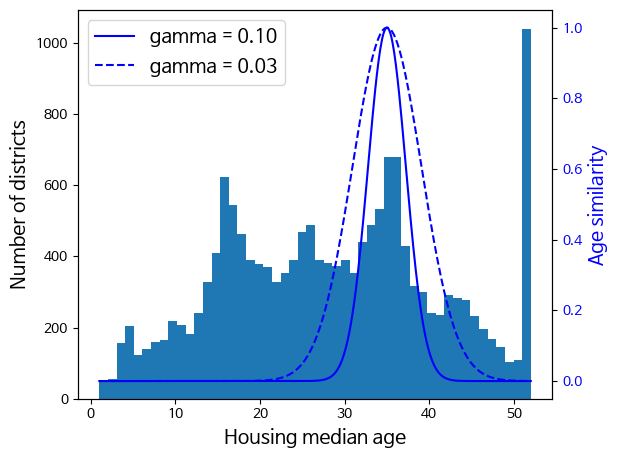

In [65]:
# 추가 코드 – 이 셀은 그림 2–18을 생성 합니다

ages = np.linspace(housing["housing_median_age"].min(),
                   housing["housing_median_age"].max(),
                   500).reshape(-1, 1)
gamma1 = 0.1
gamma2 = 0.03
rbf1 = rbf_kernel(ages, [[35]], gamma=gamma1)
rbf2 = rbf_kernel(ages, [[35]], gamma=gamma2)

fig, ax1 = plt.subplots()

ax1.set_xlabel("Housing median age")
ax1.set_ylabel("Number of districts")
ax1.hist(housing["housing_median_age"], bins=50)

ax2 = ax1.twinx()  # x축을 공유 하는 쌍둥이 축을 만듭니다
color = "blue"
ax2.plot(ages, rbf1, color=color, label="gamma = 0.10")
ax2.plot(ages, rbf2, color=color, label="gamma = 0.03", linestyle="--")
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylabel("Age similarity", color=color)

plt.legend(loc="upper left")
save_fig("age_similarity_plot")
plt.show()

In [66]:
from sklearn.linear_model import LinearRegression

target_scaler = StandardScaler()
scaled_labels = target_scaler.fit_transform(housing_labels.to_frame())
model = LinearRegression()
model.fit(housing[["median_income"]], scaled_labels)
some_new_data = housing[["median_income"]].iloc[:5]
scaled_predictions = model.predict(some_new_data)
predictions = target_scaler.inverse_transform(scaled_predictions)

In [67]:
from sklearn.compose import TransformedTargetRegressor

model = TransformedTargetRegressor(LinearRegression(),
                                   transformer=StandardScaler())
model.fit(housing[["median_income"]], housing_labels)
predictions = model.predict(some_new_data)

###  2.5.4 사용자 정의 변환기

In [68]:
from sklearn.preprocessing import FunctionTransformer

#  log방식으로 정규화
log_transformer = FunctionTransformer(np.log, inverse_func=np.exp)
log_pop = log_transformer.transform(housing[["population"]])

In [69]:
#  RBF방식으로 정규화
# RBF 방식은 고정 포인트에서 일정 거리만큼 떨어진 값이 항상 두개이기 때문에 역함수가 없다.
rbf_transformer = FunctionTransformer(rbf_kernel,
                                      kw_args=dict(Y=[[35.]], gamma=0.1))
age_simil_35 = rbf_transformer.transform(housing[["housing_median_age"]])

In [70]:
sf_coords = 37.7749, -122.41
sf_transformer = FunctionTransformer(rbf_kernel,
                                     kw_args=dict(Y=[sf_coords],
                                                  gamma=0.1)
                                     )
sf_simil = sf_transformer.transform(housing[["latitude", "longitude"]])

In [71]:
ratio_transformer = FunctionTransformer(lambda X: X[:, [0]] / X[:,[1]])
ratio_transformer.transform(np.array([[1., 2.,], [3., 4.]]))


array([[0.5 ],
       [0.75]])

In [72]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils.validation import check_array, check_is_fitted
"""
sklearn의 BaseEstimator와 TransformerMixin을 상속하여 StandardScaler의 변형 버전을 구현한 것입니다.
StandardScaler는 데이터의 평균을 0으로 맞추고, 표준편차를 1로 맞추는 스케일링을 수행합니다.
"""
class StandardScalerClone(BaseEstimator, TransformerMixin):
    def __init__(self, with_mean=True):  # *args나 **kwargs를 사용하지 않습니다!
        self.with_mean = with_mean

    def fit(self, X, y=None):  # 사용하지 않더라도 y를 넣어 주어야 합니다
        X = check_array(X)  # X가 부동소수점 배열인지 확인합니다
        self.mean_ = X.mean(axis=0)
        self.scale_ = X.std(axis=0)
        self.n_features_in_ = X.shape[1]  # 모든 추정기는 fit()에서 이를 저장합니다.
        return self  # 항상 self를 반환합니다!

    def transform(self, X):
        check_is_fitted(self)  # (훈련으로) 학습된 속성이 있는지 확인합니다
        X = check_array(X)
        assert self.n_features_in_ == X.shape[1]
        if self.with_mean:
            X = X - self.mean_
        return X / self.scale_

In [73]:
from sklearn.cluster import KMeans

"""
 BaseEstimator와 TransformerMixin을 상속하여 클러스터 중심과의 유사도를 계산하는 변환기 클래스를 구현한 것입니다.
 이 클래스는 KMeans 알고리즘을 사용하여 클러스터 중심을 찾고, RBF(Radial Basis Function) 커널을 이용해 입력 데이터와 클러스터 중심 간의 유사도를 계산합니다
"""

class ClusterSimilarity(BaseEstimator, TransformerMixin):
    def __init__(self, n_clusters=10, gamma=1.0, random_state=None):
        self.n_clusters = n_clusters
        self.gamma = gamma
        self.random_state = random_state

    def fit(self, X, y=None, sample_weight=None):
        # 사이킷런 1.2버전에서 최상의 결과를 찾기 위해 반복하는 횟수를 지정하는 `n_init` 매개변수 값에 `'auto'`가 추가되었습니다.
        # `n_init='auto'`로 지정하면 초기화 방법을 지정하는 `init='random'`일 때 10, `init='k-means++'`일 때 1이 됩니다.
        # 사이킷런 1.4버전에서 `n_init`의 기본값이 10에서 `'auto'`로 바뀝니다. 경고를 피하기 위해 `n_init=10`으로 지정합니다.
        self.kmeans_ = KMeans(self.n_clusters, n_init=10, random_state=self.random_state)
        self.kmeans_.fit(X, sample_weight=sample_weight)
        return self  # 항상 self를 반환합니다!

    def transform(self, X):
        return rbf_kernel(X, self.kmeans_.cluster_centers_, gamma=self.gamma)

    def get_feature_names_out(self, names=None):
        return [f"클러스터 {i} 유사도" for i in range(self.n_clusters)]


In [74]:
cluster_simil = ClusterSimilarity(n_clusters=10, gamma=1., random_state=42)
similarities = cluster_simil.fit_transform(housing[["latitude", "longitude"]], sample_weight=housing_labels)


In [75]:
similarities[:3].round(2)

array([[0.08, 0.  , 0.6 , 0.  , 0.  , 0.99, 0.  , 0.  , 0.  , 0.14],
       [0.  , 0.99, 0.  , 0.04, 0.  , 0.  , 0.11, 0.  , 0.63, 0.  ],
       [0.44, 0.  , 0.3 , 0.  , 0.  , 0.7 , 0.  , 0.01, 0.  , 0.29]])

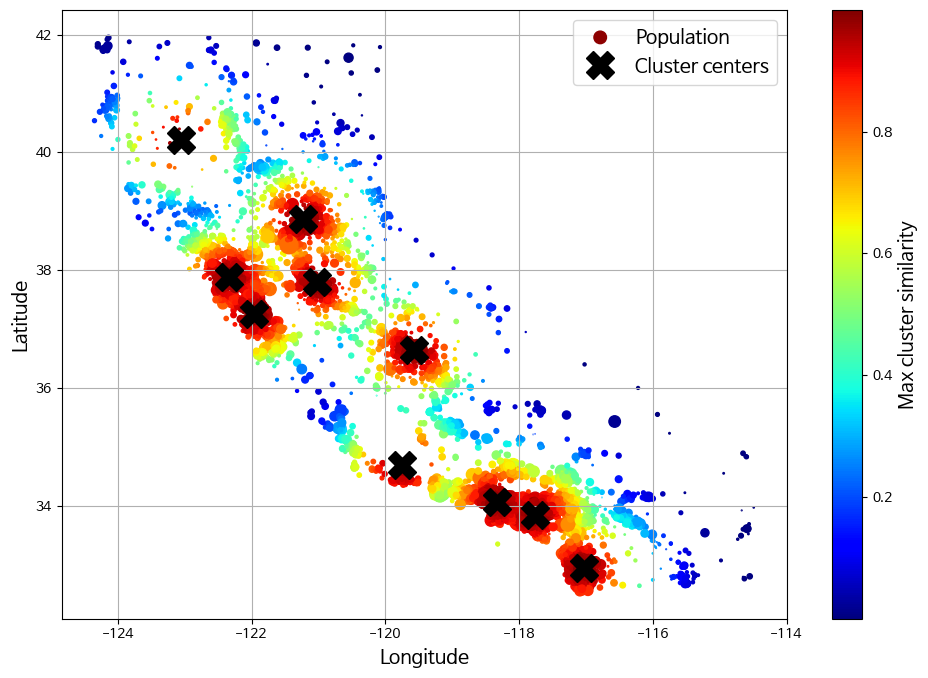

In [76]:
# 추가 코드 – 이 셀은 그림 2–19를 생성합니다

housing_renamed = housing.rename(columns={
    "latitude": "Latitude", "longitude": "Longitude",
    "population": "Population",
    "median_house_value": "Median house value (ᴜsᴅ)"})
housing_renamed["Max cluster similarity"] = similarities.max(axis=1)

housing_renamed.plot(kind="scatter", x="Longitude", y="Latitude", grid=True,
                     s=housing_renamed["Population"] / 100, label="Population",
                     c="Max cluster similarity",
                     cmap="jet", colorbar=True,
                     legend=True, sharex=False, figsize=(10, 7))
plt.plot(cluster_simil.kmeans_.cluster_centers_[:, 1],
         cluster_simil.kmeans_.cluster_centers_[:, 0],
         linestyle="", color="black", marker="X", markersize=20,
         label="Cluster centers")
plt.legend(loc="upper right")
save_fig("district_cluster_plot")
plt.show()

K-평균으로 찾은 클러스터 10개의 중심을 보여준다.

### 2.5.5 변환 파이프라인

In [77]:
from sklearn.pipeline import Pipeline

num_pipline = Pipeline([
    ("impute", SimpleImputer(strategy="median")),
    ("standardize", StandardScaler())
])

Pipeline 생성자는 연속적인 단계를 정의하는 이름/ 추정기 쌍(2개의 원소를 가진 튜플)의 리스트를 받는다.
<br>
이름은 이중 밑줄 문자(__)를 포함하지 않으면서 고유하다면 어떤 것도 가능하다

In [78]:
from sklearn.pipeline import make_pipeline

num_pipeline = make_pipeline(SimpleImputer(strategy="median"), StandardScaler())

* 여러 단계를 순차적으로 묶어주는 함수입니다. 각 단계는 튜플 형태로, 첫 번째 요소는 이름, 두 번째 요소는 변환기나 추정기입니다. 이름은 생략할 수 있으며, 이 경우 자동으로 생성됩니다.
* make_pipeline을 사용하여 SimpleImputer와 StandardScaler를 순차적으로 적용하는 파이프라인을 생성합니다.
* SimpleImputer(strategy="median"): 결측값을 각 열의 중앙값으로 대체합니다.
* StandardScaler(): 각 열의 평균을 0으로, 표준편차를 1로 맞추어 스케일링합니다.


In [79]:
from sklearn import set_config

set_config(display='diagram')

num_pipeline

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler())])

In [80]:
housing_num_prepared = num_pipeline.fit_transform(housing_num)
housing_num_prepared[:2].round(2)

array([[-1.42,  1.01,  1.86,  0.31,  1.37,  0.14,  1.39, -0.94],
       [ 0.6 , -0.7 ,  0.91, -0.31, -0.44, -0.69, -0.37,  1.17]])

* num_pipeline.fit_transform(housing_num): 파이프라인을 사용하여 housing_num 데이터에 대해 결측값을 대체하고 스케일링을 수행합니다.
* housing_num_prepared는 변환된 데이터입니다.
* housing_num_prepared[:2].round(2): 변환된 데이터의 첫 두 행을 소수점 둘째 자리까지 반올림하여 결과를 확인합니다.

In [81]:
df_housing_num_prepared = pd.DataFrame(housing_num_prepared, columns=num_pipeline.get_feature_names_out(),
                                       index=housing_num.index)


* pd.DataFrame을 사용하여 변환된 데이터를 DataFrame으로 변환합니다.
* columns=num_pipeline.get_feature_names_out(): 변환 후의 특성 이름을 DataFrame의 열 이름으로 설정합니다.
* index=housing_num.index: 원본 데이터의 인덱스를 유지하여 DataFrame을 생성합니다.

파이프라인은 인덱싱을 지원한다.

In [82]:
from sklearn.compose import ColumnTransformer

num_attribs = ["longitude", "latitude", "housing_median_age", "total_rooms",
               "total_bedrooms", "population", "households", "median_income"]
cat_attribs = ["ocean_proximity"]

cat_pipeline = make_pipeline(
    SimpleImputer(strategy="most_frequent"),
    OneHotEncoder(handle_unknown="ignore")
)

preprocessing = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", cat_pipeline, cat_attribs)
])

**ColumnTransformer**는 사이킷런(Scikit-learn)에서 제공하는 유용한 도구로, 서로 다른 전처리 과정을 여러 특성(컬럼)에 대해 한 번에 적용할 수 있게 해줍니다. 특히, 서로 다른 데이터 유형(예: 수치형 데이터, 범주형 데이터)을 가진 컬럼들을 처리할 때 매우 유용합니다.

주요 기능
* 다양한 전처리기 적용: 각 컬럼에 대해 서로 다른 전처리기를 적용할 수 있습니다.
* 전처리 및 모델링 통합: 전처리와 모델링 과정을 하나의 파이프라인으로 통합하여 관리할 수 있습니다.
* 자동 컬럼 선택: 컬럼 이름이나 인덱스를 통해 자동으로 컬럼을 선택하여 전처리기를 적용할 수 있습니다.


```
# ColumnTransformer 구성
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['age', 'salary']),
        ('cat', OneHotEncoder(), ['city'])
    ])

# 파이프라인 구성
pipeline = make_pipeline(preprocessor, LogisticRegression())

# 모델 학습
pipeline.fit(X_train, y_train)

# 예측
y_pred = pipeline.predict(X_test)
```


In [83]:
from sklearn.compose import make_column_selector, make_column_transformer

preprocessing = make_column_transformer(
    (num_pipeline, make_column_selector(dtype_include=np.number)),
    (cat_pipeline, make_column_selector(dtype_include=object)),
)

In [84]:
housing_prepared = preprocessing.fit_transform(housing)

코드 역할 정리


*   대부분의 머신러닝 알고리즘은 누락된 값을 기대하지 않기 떄문에 수치형 특성의 경우 누락된 값을 중간값으로 대체한다. 범주형 특성의 경우 누락된 값을 가장 많이 등장하는 카테고리로 바꾼다.
*   대부분의 머신러닝 알고리즘은 수치 입력만 받기 때문에 범주형 특성을 원핫 인코딩한다.
*   비율특성인 bedrooms_ratio, rooms_per_house, people_per_house를 계산하여 추가한다. 이런 특성은 중간 주택 가격과 상관관계가 높으므로 머신러닝 모델에 도움이 되기를 기대해볼 수 있다.
*   몇 가지 클러스터 유사도 특성을 추가한다. 위도와 경도보다 모델에 더 유용할 가능성이 높다.
*   대부분의 모델은 균등 분포나 가우스 분포에 가까운 특성을 선호하기 때문에 꼬리가 두꺼운 분포를 띠는 특성을 로그값으로 바꾼다.
*   대부분의 머신러닝 알고리즘은 모든 특성이 대체로 동일한 스케일을 가질 때 잘 작동하므로 모든 수치 특성을 표준화한다.




In [85]:
def column_ratio(X):
    return X[:, [0]] / X[:, [1]]

def ratio_name(function_transformer, feature_names_in):
    return ["ratio"]  # get_feature_names_out에 사용

def ratio_pipeline():
    return make_pipeline(
        SimpleImputer(strategy="median"),
        FunctionTransformer(column_ratio, feature_names_out=ratio_name),
        StandardScaler())

log_pipeline = make_pipeline(
    SimpleImputer(strategy="median"),
    FunctionTransformer(np.log, feature_names_out="one-to-one"),
    StandardScaler())
cluster_simil = ClusterSimilarity(n_clusters=10, gamma=1., random_state=42)
default_num_pipeline = make_pipeline(SimpleImputer(strategy="median"),
                                     StandardScaler())
preprocessing = ColumnTransformer([
        ("bedrooms", ratio_pipeline(), ["total_bedrooms", "total_rooms"]),
        ("rooms_per_house", ratio_pipeline(), ["total_rooms", "households"]),
        ("people_per_house", ratio_pipeline(), ["population", "households"]),
        ("log", log_pipeline, ["total_bedrooms", "total_rooms", "population",
                               "households", "median_income"]),
        ("geo", cluster_simil, ["latitude", "longitude"]),
        ("cat", cat_pipeline, make_column_selector(dtype_include=object)),
    ],
    remainder=default_num_pipeline)  # 남은 특성: housing_median_age

In [86]:
housing_prepared = preprocessing.fit_transform(housing)
housing_prepared.shape

(16512, 25)

In [87]:
preprocessing.get_feature_names_out()

array(['bedrooms__ratio', 'rooms_per_house__ratio',
       'people_per_house__ratio', 'log__total_bedrooms',
       'log__total_rooms', 'log__population', 'log__households',
       'log__median_income', 'geo__클러스터 0 유사도', 'geo__클러스터 1 유사도',
       'geo__클러스터 2 유사도', 'geo__클러스터 3 유사도', 'geo__클러스터 4 유사도',
       'geo__클러스터 5 유사도', 'geo__클러스터 6 유사도', 'geo__클러스터 7 유사도',
       'geo__클러스터 8 유사도', 'geo__클러스터 9 유사도',
       'cat__ocean_proximity_<1H OCEAN', 'cat__ocean_proximity_INLAND',
       'cat__ocean_proximity_ISLAND', 'cat__ocean_proximity_NEAR BAY',
       'cat__ocean_proximity_NEAR OCEAN', 'remainder__housing_median_age',
       'remainder__income_cat'], dtype=object)

# 2.6 모델 선택과 훈련

## 2.6.1 훈련 세트에서 훈련하고 평가하기

In [88]:
from sklearn.linear_model import LinearRegression

lin_reg = make_pipeline(preprocessing, LinearRegression())
lin_reg.fit(housing, housing_labels)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                              SimpleImputer(strategy='median')),
                                                             ('standardscaler',
                                                              StandardScaler())]),
                                   transformers=[('bedrooms',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(feature_names_out=<function ratio_name at 0x7e9...
                                                   'median_income']),
                                                 ('geo',
                                                  ClusterSimilarity(random_state=42),
                                                  ['latitude', 'longitude']),
                                                 ('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7e97bffc3d30>)])),
                ('linearregression', LinearRegression())])

### 훈련세트에 적용시키고 다섯개의 예측데이터를 비교

In [89]:
housing_predictions = lin_reg.predict(housing)
housing_predictions[:5].round(-2) # -2 = 십의 자리에서 반올림
housing_labels.iloc[:5].values

array([458300., 483800., 101700.,  96100., 361800.])

### RMSE를 통한 성능 측정

In [90]:
from sklearn.metrics import mean_squared_error
lin_rmse = mean_squared_error(housing_labels,
                              housing_predictions,
                              squared=False)
lin_rmse

68004.52469464038

대부분 구역의 중간 주택 가격은 $120,000에서 $265,000 사이이다. 그러므로 예측 오차 $68,628인 것은 매우 만족스럽지 못하다. 이는 모델이 훈련 데이터에 과소적합된 사례이다.

과소적합인 경우, 더 강력한 모델을 사용하거나, 더 좋은 특성을 주입하거나, 모델의 규제를 감소시켜야한다.


하지만 지금 같은 경우 규제를 하지 않았기 때문에 더 강력한 모델을 테스트한다.

In [91]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = make_pipeline(preprocessing, DecisionTreeRegressor(random_state=42))
tree_reg.fit(housing, housing_labels)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                              SimpleImputer(strategy='median')),
                                                             ('standardscaler',
                                                              StandardScaler())]),
                                   transformers=[('bedrooms',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(feature_names_out=<function ratio_name at 0x7e9...
                                                  ClusterSimilarity(random_state=42),
                                                  ['latitude', 'longitude']),
                                                 ('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7e97bffc3d30>)])),
                ('decisiontreeregressor',
                 DecisionTreeRegressor(random_state=42))])

In [92]:
housing_predictions = tree_reg.predict(housing)
tree_rmse = mean_squared_error(housing_labels,
                               housing_predictions,
                               squared=False)
tree_rmse

0.0

모델이 데이터에 과대적합했을 가능성이 크다. 확신이 드는 모델을 론칭하기 전까지는 테스트 세트를 사용하지 않을 것이기 때문에 훈련세트의 일부분으로 훈련하고 다른 일부분을 모델 검증에 사용해야 합니다.

### 2.6.2 교차 검증으로 평가하기

In [93]:
from sklearn.model_selection import cross_val_score
tree_rmses = - cross_val_score(tree_reg,
                               housing,
                               housing_labels,
                               scoring="neg_root_mean_squared_error",
                               cv=10
                               )

사이킷런의 교차 검증 기능은 scoring 매개변수에 비용함수(낮을 수록 좋은)가 아니라 효용 함수(클수록 좋은)를 기대한다.
<br>
neg_mean_squared_error 함수는 RMSE의 음숫값을 출력한다. 그래서 "-"를 추가해야함

In [94]:
pd.Series(tree_rmses).describe()

count       10.000000
mean     66828.991942
std       2109.500358
min      63504.013557
25%      65456.007554
50%      66483.337336
75%      68375.606282
max      70322.608451
dtype: float64

결과가 별로임

In [95]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = make_pipeline(preprocessing,
                           RandomForestRegressor(random_state=42))
forest_rmses = -cross_val_score(forest_reg,
                                housing,
                                housing_labels,
                                scoring="neg_root_mean_squared_error",
                                cv=10
                                )

In [96]:
pd.Series(forest_rmses).describe()

count       10.000000
mean     47007.661117
std       1071.885942
min      45438.898450
25%      46378.232205
50%      47090.462095
75%      47406.931316
max      49311.141107
dtype: float64

하이퍼파라미터 조정에 너무 많은 시간을 쓰지말고 여러 종류의 머신러닝 알고리즘에서 다양한 모델을 시도하자


# 2.7 모델 미세 튜닝

## 2.7.1 그리드 서치

In [98]:
from sklearn.model_selection import GridSearchCV

full_pipeline = Pipeline([
    ("preprocessing", preprocessing),
    ("random_forest", RandomForestRegressor(random_state=42)),
])

param_grid = [
    {'preprocessing__geo__n_clusters': [5, 8, 10],
     'random_forest__max_features': [4, 6, 8]},
    {'preprocessing__geo__n_clusters': [10, 15],
     'random_forest__max_features': [6, 8, 10],}
]

grid_search = GridSearchCV(full_pipeline,
                           param_grid,
                           cv=3,
                           scoring='neg_root_mean_squared_error'
                           )
grid_search.fit(housing, housing_labels)



GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                                                     SimpleImputer(strategy='median')),
                                                                                    ('standardscaler',
                                                                                     StandardScaler())]),
                                                          transformers=[('bedrooms',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('functiontransformer',
                                                                                          FunctionTransformer(feature_names_out=<f...
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x7e97bffc3d30>)])),
                                       ('random_forest',
                                        RandomForestRegressor(random_state=42))]),
             param_grid=[{'preprocessing__geo__n_clusters': [5, 8, 10],
                          'random_forest__max_features': [4, 6, 8]},
                         {'preprocessing__geo__n_clusters': [10, 15],
                          'random_forest__max_features': [6, 8, 10]}],
             scoring='neg_root_mean_squared_error')

`full_pipeline.get_params().keys()`를 사용해 전체 하이퍼파라미터 리스트를 얻을 수 있습니다:

In [107]:
# 추가 코드 – get_params().keys() 출력의 일부를 보여 줍니다
print(str(full_pipeline.get_params().keys())[:1000] + "...")

dict_keys(['memory', 'steps', 'verbose', 'preprocessing', 'random_forest', 'preprocessing__n_jobs', 'preprocessing__remainder__memory', 'preprocessing__remainder__steps', 'preprocessing__remainder__verbose', 'preprocessing__remainder__simpleimputer', 'preprocessing__remainder__standardscaler', 'preprocessing__remainder__simpleimputer__add_indicator', 'preprocessing__remainder__simpleimputer__copy', 'preprocessing__remainder__simpleimputer__fill_value', 'preprocessing__remainder__simpleimputer__keep_empty_features', 'preprocessing__remainder__simpleimputer__missing_values', 'preprocessing__remainder__simpleimputer__strategy', 'preprocessing__remainder__standardscaler__copy', 'preprocessing__remainder__standardscaler__with_mean', 'preprocessing__remainder__standardscaler__with_std', 'preprocessing__remainder', 'preprocessing__sparse_threshold', 'preprocessing__transformer_weights', 'preprocessing__transformers', 'preprocessing__verbose', 'preprocessing__verbose_feature_names_out', 'prepr

In [99]:
grid_search.best_params_

{'preprocessing__geo__n_clusters': 15, 'random_forest__max_features': 6}

In [108]:
grid_search.best_estimator_

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                              SimpleImputer(strategy='median')),
                                                             ('standardscaler',
                                                              StandardScaler())]),
                                   transformers=[('bedrooms',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(feature_names_out=<function ratio_name at 0x7e97c29...
                                                  ClusterSimilarity(n_clusters=15,
                                                                    random_state=42),
                                                  ['latitude', 'longitude']),
                                                 ('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7e97c01c1210>)])),
                ('random_forest',
                 RandomForestRegressor(max_features=6, random_state=42))])

In [109]:
cv_res = pd.DataFrame(grid_search.cv_results_)
cv_res.sort_values(by="mean_test_score", ascending=False, inplace=True)

# 추가 코드 – 데이터프레임을 깔끔하게 출력하기 위한 코드입니다
cv_res = cv_res[["param_preprocessing__geo__n_clusters",
                 "param_random_forest__max_features", "split0_test_score",
                 "split1_test_score", "split2_test_score", "mean_test_score"]]
score_cols = ["split0", "split1", "split2", "mean_test_rmse"]
cv_res.columns = ["n_clusters", "max_features"] + score_cols
cv_res[score_cols] = -cv_res[score_cols].round().astype(np.int64)

cv_res.head()

,n_clusters,max_features,split0,split1,split2,mean_test_rmse
12,15,6,44197,44705,45422,44775
13,15,8,44756,44952,45660,45123
14,15,10,45302,45113,45943,45453
7,10,6,45306,45748,46694,45916
9,10,6,45306,45748,46694,45916


### 2.7.2 랜덤 서치


`GridSearchCV` -  임의의 수를 대입하여 지정한 횟수만큼 평가<br>
`RandomizedSearchCV` - 하이퍼파라미터 탐생공간이 커지면 종종 선호
* 하이퍼 파라미터 값이 연속적이면(또는 이산적이지만 가능한 값이 많다면) 랜덤 서치를 1000번 실행했을 때 각 하이퍼파라미터마다 1000개의 다른 값을 탐색합니다. 반면 그리드 서치는 하이퍼파라미터에 대해 나열한 몇 개의 값만을 탐색합니다.
* 어떤 하이퍼파라미터가 성능 면에서 큰 차이를 만들지 못하지만 아직 이 사실을 모른다고 가정해보죠 10개의 가능한 값이 있을 떄 이를 그리드 서치에 추가하면 훈련이 10배 더 오래 걸립니다. 하지만 이 하이퍼파라미터를 랜덤 서치에 추가하면 탐색 시간이 더 늘어나지 않습니다.
* 6개의 하이퍼파라미터에 대해 각각 10개의 값을 탐색한다면 그리드 서치는 백만 번 모델을 훈련해야 합니다. 반면 랜덤 서치는 지정한 반복 횟수만큼 실행할 수 있습니다.

In [103]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
    'preprocessing__geo__n_clusters': randint(low=3, high=50),
    'random_forest__max_features': randint(low=2, high=20)
}

rnd_search = RandomizedSearchCV(
    full_pipeline,
    param_distributions=param_distribs,
    n_iter=10,
    cv=3,
    scoring='neg_root_mean_squared_error',
    random_state=42
)

rnd_search.fit(housing, housing_labels)

RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                                                           SimpleImputer(strategy='median')),
                                                                                          ('standardscaler',
                                                                                           StandardScaler())]),
                                                                transformers=[('bedrooms',
                                                                               Pipeline(steps=[('simpleimputer',
                                                                                                SimpleImputer(strategy='median')),
                                                                                               ('functiontransformer',
                                                                                                FunctionTransformer(feature_names_...
                                             ('random_forest',
                                              RandomForestRegressor(random_state=42))]),
                   param_distributions={'preprocessing__geo__n_clusters': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7e97bfcb9c30>,
                                        'random_forest__max_features': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7e97bfdebc40>},
                   random_state=42, scoring='neg_root_mean_squared_error')

In [110]:
# 추가 코드 – 랜덤 탐색 결과를 출력합니다
cv_res = pd.DataFrame(rnd_search.cv_results_)
cv_res.sort_values(by="mean_test_score", ascending=False, inplace=True)
cv_res = cv_res[["param_preprocessing__geo__n_clusters",
                 "param_random_forest__max_features", "split0_test_score",
                 "split1_test_score", "split2_test_score", "mean_test_score"]]
cv_res.columns = ["n_clusters", "max_features"] + score_cols
cv_res[score_cols] = -cv_res[score_cols].round().astype(np.int64)
cv_res.head()

,n_clusters,max_features,split0,split1,split2,mean_test_rmse
1,45,9,41829,42825,43219,42624
5,42,4,42193,42788,43830,42937
8,32,7,42333,43057,43695,43028
0,41,16,43245,43497,44290,43677
2,23,8,43188,43795,44556,43846


`HalbingRandomSearchCV`와 `HalbingGridSearchCV` 하이퍼파라미터 탐색 클래스도 제공한다. 빠르게 훈련하고 대규모 하이퍼파라미터 공간을 탐색하기 위해 계산 자원을 더 효율적으로 사용한다.

### 2.7.3 앙상블 방법
* 7장에서 계속

### 2.7.4 최상의 모델과 오차 분석

최상의 모델을 분석하면 문제에 대한 좋은 인사이트를 얻는 경우가 많다.<br>
예를 들어 RandomForestRegressor는 정확한 예측을 만들기 위한 각 특성의 상대적인 중요도를 알려준다.


In [111]:
final_model = rnd_search.best_estimator_ # 전처리 포함됨
feature_importances = final_model["random_forest"].feature_importances_
feature_importances.round(2)

array([0.05, 0.04, 0.05, 0.01, 0.01, 0.01, 0.01, 0.16, 0.01, 0.01, 0.01,
       0.04, 0.01, 0.  , 0.02, 0.01, 0.01, 0.01, 0.01, 0.01, 0.  , 0.  ,
       0.01, 0.  , 0.01, 0.03, 0.02, 0.  , 0.01, 0.01, 0.02, 0.01, 0.01,
       0.01, 0.01, 0.01, 0.01, 0.  , 0.01, 0.01, 0.02, 0.  , 0.01, 0.01,
       0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.  , 0.06,
       0.  , 0.  , 0.  , 0.01, 0.12])

중요도 점수를 내림차순으로 정렬하고 특성 이름과 함께 표시

In [112]:
sorted(zip(feature_importances,
           final_model["preprocessing"].get_feature_names_out()),
       reverse=True
       )

[(0.16456260553039748, 'log__median_income'),
 (0.12264887480440562, 'remainder__income_cat'),
 (0.06144960021760335, 'cat__ocean_proximity_INLAND'),
 (0.05347502186039226, 'people_per_house__ratio'),
 (0.04783751917440328, 'bedrooms__ratio'),
 (0.040342284723807416, 'rooms_per_house__ratio'),
 (0.03711045390491348, 'geo__클러스터 3 유사도'),
 (0.028445462501172258, 'geo__클러스터 17 유사도'),
 (0.020716125281811163, 'geo__클러스터 6 유사도'),
 (0.018654183544598312, 'geo__클러스터 22 유사도'),
 (0.01721773323988542, 'geo__클러스터 32 유사도'),
 (0.015110660965319864, 'geo__클러스터 18 유사도'),
 (0.0142818282020754, 'geo__클러스터 41 유사도'),
 (0.013328388398764901, 'geo__클러스터 7 유사도'),
 (0.013214370003209028, 'geo__클러스터 43 유사도'),
 (0.012941557652072423, 'geo__클러스터 26 유사도'),
 (0.012566449621777647, 'remainder__housing_median_age'),
 (0.01207497972784075, 'geo__클러스터 2 유사도'),
 (0.011106515090172313, 'geo__클러스터 34 유사도'),
 (0.011085326053715802, 'geo__클러스터 38 유사도'),
 (0.010842140839832173, 'geo__클러스터 39 유사도'),
 (0.010296600955357465, 'g

시스템이 특정한 오차를 만들었다면 왜 그런 문제가 생겼는지 이해해야한다. <br>
추가 특성을 포함시키거나, 불필요한 특성을 제거하거나, 이상피를 제외하는 등 해결 방법을 찾아야한다.

### 2.7.5 테스트 세트로 시스템 평가하기

In [114]:
x_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()

final_predictions = final_model.predict(x_test)

final_rmse = mean_squared_error(y_test, final_predictions, squared=False)
print(final_rmse)

41920.34240458236


In [117]:
# 일반화 오차의 95% 신뢰 구간을 계산
from scipy import stats
confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) -1,
                         loc=squared_errors.mean(),
                         scale=stats.sem(squared_errors)))

array([39769.19856406, 43966.36282668])

하이퍼파라미터 튜닝을 많이 했다면 교차 검증을 사용해 측정한 것보다 성능이 조금 낮은 것이 보통이다1!!
<br>
<br>
이 예제에서는 테스트 RMSE가 검증 RMSE보다 낮기 때문에 성능이 낮아지진 않는다.<br>
<br>
이런 경우가 생기더라도 테스트 세트에서 성능 수피를 좋게 하려고 하이퍼파라미터를 튜닝하려 시도해서는 안된다.!!
<br>
<br>
왜냐하면 그렇게 향상된 성능은 새로운 데이터에 일반화되기 어렵다.

**보너스 섹션: 하이퍼파라미터를 위한 샘플링 분포 선택 방법**

* `scipy.stats.randint(a, b+1)`: a~b 사이의 _이산적인_ 값을 가진 하이퍼파라미터. 이 범위의 모든 값은 동일한 확률 가집니다.
* `scipy.stats.uniform(a, b)`: 매우 비슷하지만 _연속적인_ 파라미터에 사용합니다.
* `scipy.stats.geom(1 / scale)`: 이산적인 값의 경우 주어진 스케일 안에서 샘플링하고 싶을 때 사용합니다. 예를 들어 scale=1000인 경우 대부분의 샘플은 이 범주 안에 있지만 모든 샘플 중 10% 정도는 100보다 작고, 10% 정도는 2300보다 큽니다.
* `scipy.stats.expon(scale)`: `geom`의 연속적인 버전입니다. `scale`을 가장 많이 등장할 값으로 지정합니다.
* `scipy.stats.loguniform(a, b)`: 하이퍼파라미터 값의 스케일을 어떻게 지정할지 모를 때 사용합니다. a=0.01, b=100으로 지정하면 0.01과 0.1 사이의 샘플링과 10과 100 사이의 샘플링 비율이 동일합니다.

다음은 `randint()`, `uniform()`, `geom()`, `expon()`에 대한 확률 질량 함수(이산형 변수)와 확률 밀도 함수(연속형 변수)의 그래프입니다:

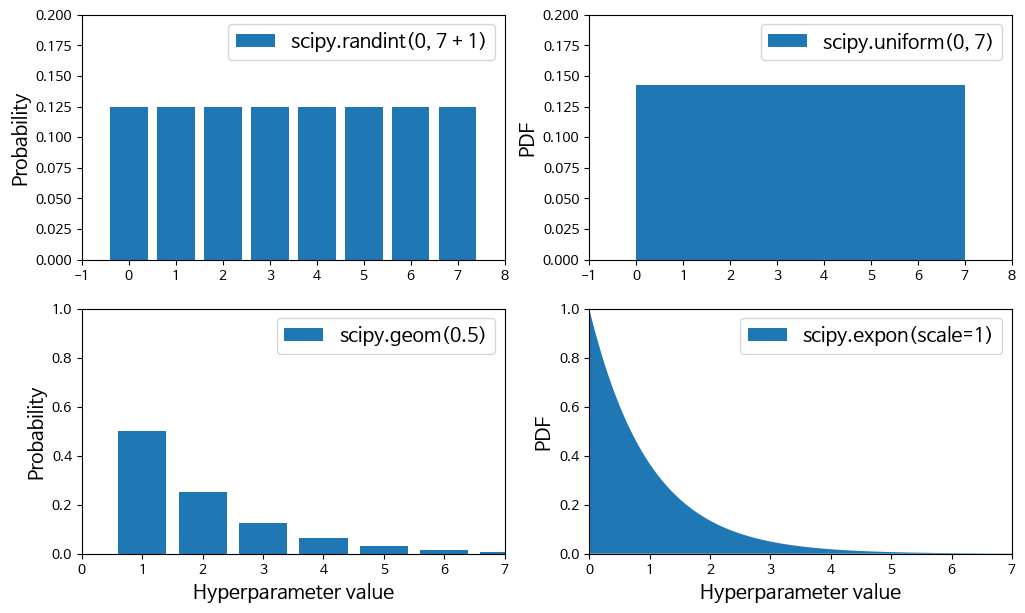

In [119]:
# 추가 코드 – 랜덤 서치에서 사용할 수 있는 몇가지 분포에 대한 그래프

from scipy.stats import randint, uniform, geom, expon

xs1 = np.arange(0, 7 + 1)
randint_distrib = randint(0, 7 + 1).pmf(xs1)

xs2 = np.linspace(0, 7, 500)
uniform_distrib = uniform(0, 7).pdf(xs2)

xs3 = np.arange(0, 7 + 1)
geom_distrib = geom(0.5).pmf(xs3)

xs4 = np.linspace(0, 7, 500)
expon_distrib = expon(scale=1).pdf(xs4)

plt.figure(figsize=(12, 7))

plt.subplot(2, 2, 1)
plt.bar(xs1, randint_distrib, label="scipy.randint(0, 7 + 1)")
plt.ylabel("Probability")
plt.legend()
plt.axis([-1, 8, 0, 0.2])

plt.subplot(2, 2, 2)
plt.fill_between(xs2, uniform_distrib, label="scipy.uniform(0, 7)")
plt.ylabel("PDF")
plt.legend()
plt.axis([-1, 8, 0, 0.2])

plt.subplot(2, 2, 3)
plt.bar(xs3, geom_distrib, label="scipy.geom(0.5)")
plt.xlabel("Hyperparameter value")
plt.ylabel("Probability")
plt.legend()
plt.axis([0, 7, 0, 1])

plt.subplot(2, 2, 4)
plt.fill_between(xs4, expon_distrib, label="scipy.expon(scale=1)")
plt.xlabel("Hyperparameter value")
plt.ylabel("PDF")
plt.legend()
plt.axis([0, 7, 0, 1])

plt.show()

다음은 `expon()`와 `loguniform()`의 확률 밀도 함수(왼쪽 열), log(X)의 확률 밀도 함수(오른쪽 열)입니다. 오른쪽 열은 하이퍼파라미터 스케일의 분포를 보여줍니다. `expon()`는 대체적으로 원하는 스케일을 따라 하이퍼파라미터를 선택하고 작은 스케일 쪽으로는 긴 꼬리를 형성합니다. 하지만 `loguniform()`는 스케일에 영향을 받지 않고 모두 동일한 확률을 가집니다:

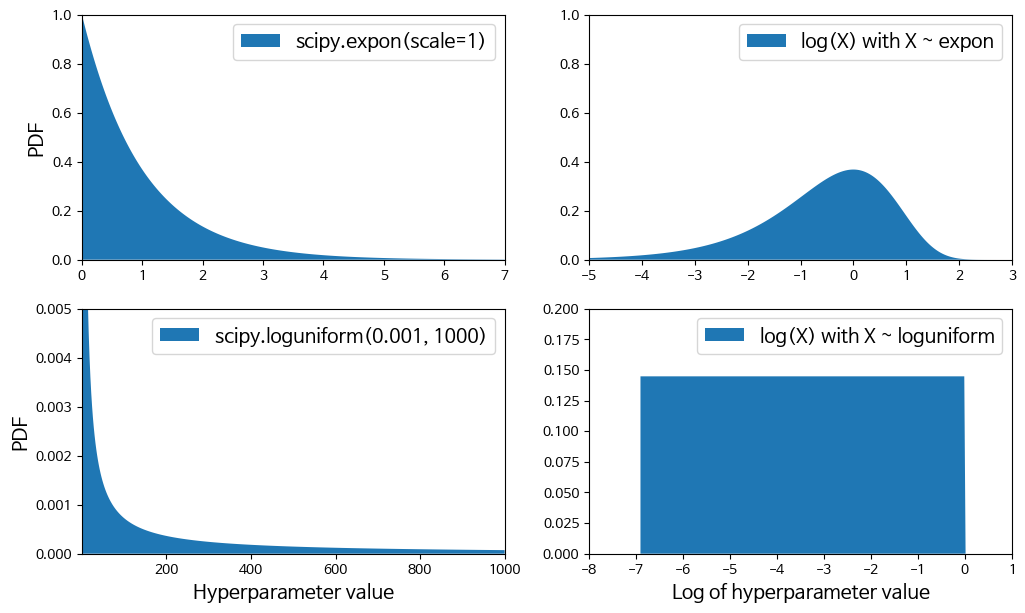

In [120]:
# 추가 코드 – expon와 loguniform의 차이를 보여줍니다

from scipy.stats import loguniform

xs1 = np.linspace(0, 7, 500)
expon_distrib = expon(scale=1).pdf(xs1)

log_xs2 = np.linspace(-5, 3, 500)
log_expon_distrib = np.exp(log_xs2 - np.exp(log_xs2))

xs3 = np.linspace(0.001, 1000, 500)
loguniform_distrib = loguniform(0.001, 1000).pdf(xs3)

log_xs4 = np.linspace(np.log(0.001), np.log(1000), 500)
log_loguniform_distrib = uniform(np.log(0.001), np.log(1000)).pdf(log_xs4)

plt.figure(figsize=(12, 7))

plt.subplot(2, 2, 1)
plt.fill_between(xs1, expon_distrib,
                 label="scipy.expon(scale=1)")
plt.ylabel("PDF")
plt.legend()
plt.axis([0, 7, 0, 1])

plt.subplot(2, 2, 2)
plt.fill_between(log_xs2, log_expon_distrib,
                 label="log(X) with X ~ expon")
plt.legend()
plt.axis([-5, 3, 0, 1])

plt.subplot(2, 2, 3)
plt.fill_between(xs3, loguniform_distrib,
                 label="scipy.loguniform(0.001, 1000)")
plt.xlabel("Hyperparameter value")
plt.ylabel("PDF")
plt.legend()
plt.axis([0.001, 1000, 0, 0.005])

plt.subplot(2, 2, 4)
plt.fill_between(log_xs4, log_loguniform_distrib,
                 label="log(X) with X ~ loguniform")
plt.xlabel("Log of hyperparameter value")
plt.legend()
plt.axis([-8, 1, 0, 0.2])

plt.show()

# 2.8 론칭, 모니터링, 시스템 유지보수

In [118]:
import joblib

joblib.dump(final_model, "my_california_housing_model.pkl")
# 원하는 모델로 쉽게 돌아올 수 있도록 실험한 모든 모델을 저장하는 것이 좋다.

['my_california_housing_model.pkl']

이제 모델을 제품 환경에 배포할 수 있습니다. 예를 들어, 제품 환경에서 실행하기 위한 스크립트는 다음과 같을 것입니다:

In [121]:
import joblib

# 추가 코드 – 책에는 간결함을 위해 제외함
from sklearn.cluster import KMeans
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.metrics.pairwise import rbf_kernel

def column_ratio(X):
    return X[:, [0]] / X[:, [1]]

#class ClusterSimilarity(BaseEstimator, TransformerMixin):
#    [...]

final_model_reloaded = joblib.load("my_california_housing_model.pkl")

new_data = housing.iloc[:5]  # 새로운 구역이라 가정
predictions = final_model_reloaded.predict(new_data)

In [122]:
predictions

array([432399.14, 452785.06, 107790.  ,  97622.  , 349001.06])

`pickle`을 사용할 수도 있지만 `joblib`이 더 효율적입니다.

# 2.9 직접 해보세요!

## 고수준 알고리즘을 탐색하느라 시간을 모두 허비해서 전체 프로세스 구축에 충분한 시간을 추자하지 못하는 것보다 서너 개의 알고리즘만으로라도 전체 프로세스를 올바로 구축하는 편이 더 낫다는 것을 알아야한다!